___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv('weather.csv')
weather.head()

STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0  USC00379423  2005-01-01   NaN   NaN  47.0  28.0   NaN   NaN   NaN   NaN   
1  USC00379423  2005-01-02   NaN   NaN  52.0  24.0   NaN   NaN   NaN   NaN   
2  USC00379423  2005-01-03   NaN   NaN  48.0  27.0   NaN   NaN   NaN   NaN   
3  USC00379423  2005-01-04   NaN   NaN  54.0  40.0   NaN   NaN   NaN   NaN   
4  USC00379423  2005-01-05   NaN   NaN  44.0  31.0   NaN   NaN   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 26 columns]

In [4]:
weather.shape

(8022, 26)

In [6]:
weather[["TMIN", "TAVG", "TMAX"]].describe()


TMIN         TAVG         TMAX
count  7996.000000  1217.000000  8005.000000
mean     42.099425    52.493016    61.247096
std      17.386667    17.829792    18.495043
min     -10.000000     6.000000    13.000000
25%      29.000000    39.000000    46.000000
50%      42.000000    54.000000    62.000000
75%      57.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000

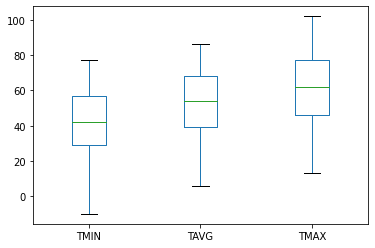

In [16]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

plt.show()

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [7]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]


In [8]:
weather.TDIFF.describe()


count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

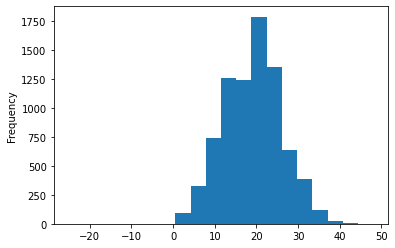

In [9]:
weather.TDIFF.plot(kind = "hist", bins = 20)

plt.show()


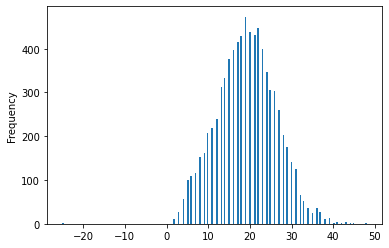

In [10]:
weather.TDIFF.plot(kind = "hist", bins = 200)

plt.show()


In [11]:
weather.head()


STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0  USC00379423  2005-01-01   NaN   NaN  47.0  28.0   NaN   NaN   NaN   NaN   
1  USC00379423  2005-01-02   NaN   NaN  52.0  24.0   NaN   NaN   NaN   NaN   
2  USC00379423  2005-01-03   NaN   NaN  48.0  27.0   NaN   NaN   NaN   NaN   
3  USC00379423  2005-01-04   NaN   NaN  54.0  40.0   NaN   NaN   NaN   NaN   
4  USC00379423  2005-01-05   NaN   NaN  44.0  31.0   NaN   NaN   NaN   NaN   

   ...  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TDIFF  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   19.0  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   28.0  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   21.0  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   14.0  
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   13.0  

[5 rows x 27 columns]

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [12]:
weather.head(3)

STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0  USC00379423  2005-01-01   NaN   NaN  47.0  28.0   NaN   NaN   NaN   NaN   
1  USC00379423  2005-01-02   NaN   NaN  52.0  24.0   NaN   NaN   NaN   NaN   
2  USC00379423  2005-01-03   NaN   NaN  48.0  27.0   NaN   NaN   NaN   NaN   

   ...  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TDIFF  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   19.0  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   28.0  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   21.0  

[3 rows x 27 columns]

In [16]:
WT = weather.loc[:, "WT01": "WT22"]
WT.head(3)

WT01  WT02  WT03  WT04  WT05  WT06  WT07  WT08  WT09  WT10  WT11  WT13  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [17]:
weather["bad_conditions"] = WT.sum(axis = "columns")


In [25]:
weather.sample(n = 5)


STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
3945  USC00379423  2015-11-16   NaN   NaN  56.0  35.0   NaN   NaN   NaN   NaN   
6746  USW00014765  2012-07-04  7.16   NaN  87.0  69.0   NaN   NaN   NaN   NaN   
2513  USC00379423  2011-12-07   NaN   NaN  60.0  54.0   NaN   NaN   NaN   NaN   
2050  USC00379423  2010-08-27   NaN   NaN  82.0  54.0   NaN   NaN   NaN   NaN   
4224  USW00014765  2005-08-08  8.28   NaN  91.0  67.0   1.0   NaN   NaN   NaN   

      ...  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TDIFF  \
3945  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   21.0   
6746  ...   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   18.0   
2513  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    6.0   
2050  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   28.0   
4224  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   24.0   

      bad_conditions  
3945             0.0  
6746             2.0  
2513             0.0  
2050             0.0  
4224             3.0  

[5 rows x 28 columns]

In [26]:
weather['bad_conditions'] = weather.bad_conditions.fillna(value = 0)


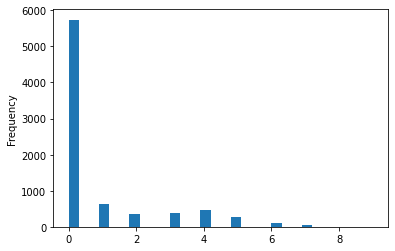

In [27]:
weather.bad_conditions.plot(kind = "hist", bins = 30)

plt.show()

In [28]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [29]:
weather.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [30]:
mapping = {0 : "good", 1 : "bad", 2 : "bad", 3 : "bad", 4 : "bad", 5 : "worse", 6 : "worse", 7 :  "worse", 8 :  "worse", 9 :  "worse" }


In [32]:
weather["rating"] = weather.bad_conditions.map(mapping)


In [34]:
weather.rating.value_counts()


good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [35]:
weather.rating[0]


'good'

In [36]:
type(weather.rating[0])


str

In [37]:
categ = ["good", "bad", "worse"]


In [38]:
weather["rating"] = pd.Categorical(weather.rating, categories = categ, ordered=True )


In [40]:
weather.rating.head()


0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [41]:
import pandas as pd
ri = pd.read_csv('ri.csv', low_memory =False, index_col = 'stop_datetime', nrows = 50000)
ri.head(3)

id   stop_date stop_time location_raw  \
stop_datetime                                                           
2005-01-02 01:55:00  RI-2005-00001  2005-01-02     01:55      Zone K1   
2005-01-02 20:30:00  RI-2005-00002  2005-01-02     20:30      Zone X4   
2005-01-04 12:55:00  RI-2005-00004  2005-01-04     12:55      Zone X4   

                    police_department driver_gender  driver_age_raw  \
stop_datetime                                                         
2005-01-02 01:55:00               600             M          1985.0   
2005-01-02 20:30:00               500             M          1987.0   
2005-01-04 12:55:00               500             M          1986.0   

                     driver_age driver_race_raw driver_race  ...  \
stop_datetime                                                ...   
2005-01-02 01:55:00        20.0               W       White  ...   
2005-01-02 20:30:00        18.0               W       White  ...   
2005-01-04 12:55:00        19.0               W       White  ...   

                    search_conducted search_type_raw  search_type  \
stop_datetime                                                       
2005-01-02 01:55:00            False             NaN          NaN   
2005-01-02 20:30:00            False             NaN          NaN   
2005-01-04 12:55:00            False             NaN          NaN   

                    contraband_found stop_outcome  is_arrested stop_duration  \
stop_datetime                                                                  
2005-01-02 01:55:00            False     Citation        False      0-15 Min   
2005-01-02 20:30:00            False     Citation        False     16-30 Min   
2005-01-04 12:55:00            False     Citation        False      0-15 Min   

                     out_of_state drugs_related_stop district  
stop_datetime                                                  
2005-01-02 01:55:00         False              False  Zone K1  
2005-01-02 20:30:00         False              False  Zone X4  
2005-01-04 12:55:00         False              False  Zone X4  

[3 rows x 22 columns]

In [42]:
ri.reset_index(inplace = True)


In [45]:
ri.head(3)


stop_datetime             id   stop_date stop_time location_raw  \
0  2005-01-02 01:55:00  RI-2005-00001  2005-01-02     01:55      Zone K1   
1  2005-01-02 20:30:00  RI-2005-00002  2005-01-02     20:30      Zone X4   
2  2005-01-04 12:55:00  RI-2005-00004  2005-01-04     12:55      Zone X4   

  police_department driver_gender  driver_age_raw  driver_age driver_race_raw  \
0               600             M          1985.0        20.0               W   
1               500             M          1987.0        18.0               W   
2               500             M          1986.0        19.0               W   

   ... search_conducted search_type_raw search_type  contraband_found  \
0  ...            False             NaN         NaN             False   
1  ...            False             NaN         NaN             False   
2  ...            False             NaN         NaN             False   

  stop_outcome is_arrested  stop_duration out_of_state  drugs_related_stop  \
0     Citation       False       0-15 Min        False               False   
1     Citation       False      16-30 Min        False               False   
2     Citation       False       0-15 Min        False               False   

  district  
0  Zone K1  
1  Zone X4  
2  Zone X4  

[3 rows x 23 columns]

In [48]:
weather_rating = weather[["DATE", "rating"]]
weather_rating.head(2)

DATE rating
0  2005-01-01   good
1  2005-01-02   good

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [50]:
ri.shape

(50000, 23)

In [52]:
ri_weather = pd.merge(left = ri, right = weather_rating, left_on = "stop_date", right_on = "DATE", how = "left")
ri_weather.shape

(99857, 25)

In [55]:
ri_weather.tail()


stop_datetime             id   stop_date stop_time location_raw  \
99852  2006-08-24 11:00:00  RI-2006-38027  2006-08-24     11:00      Zone X1   
99853  2006-08-24 11:05:00  RI-2006-38028  2006-08-24     11:05      Zone K2   
99854  2006-08-24 11:05:00  RI-2006-38028  2006-08-24     11:05      Zone K2   
99855  2006-08-24 11:30:00  RI-2006-38029  2006-08-24     11:30      Zone K3   
99856  2006-08-24 11:30:00  RI-2006-38029  2006-08-24     11:30      Zone K3   

      police_department driver_gender  driver_age_raw  driver_age  \
99852               000             F          1985.0        21.0   
99853               900             M          1982.0        24.0   
99854               900             M          1982.0        24.0   
99855               300             F          1984.0        22.0   
99856               300             F          1984.0        22.0   

      driver_race_raw  ... search_type contraband_found stop_outcome  \
99852               W  ...         NaN            False     Citation   
99853               W  ...         NaN            False     Citation   
99854               W  ...         NaN            False     Citation   
99855               W  ...         NaN            False     Citation   
99856               W  ...         NaN            False     Citation   

       is_arrested stop_duration out_of_state  drugs_related_stop district  \
99852        False      0-15 Min         True               False  Zone X1   
99853        False      0-15 Min         True               False  Zone K2   
99854        False      0-15 Min         True               False  Zone K2   
99855        False     16-30 Min         True               False  Zone K3   
99856        False     16-30 Min         True               False  Zone K3   

             DATE rating  
99852  2006-08-24    bad  
99853  2006-08-24   good  
99854  2006-08-24    bad  
99855  2006-08-24   good  
99856  2006-08-24    bad  

[5 rows x 25 columns]

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [56]:
ri_weather.is_arrested.mean()


0.0512132349259441

In [57]:
ri_weather.groupby("rating").is_arrested.mean()


rating
good     0.050577
bad      0.050858
worse    0.063220
Name: is_arrested, dtype: float64

In [58]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()


violation            rating
Equipment            good      0.121963
                     bad       0.124704
                     worse     0.143695
Moving violation     good      0.112704
                     bad       0.115175
                     worse     0.131124
Other                good      0.275971
                     bad       0.282828
                     worse     0.320755
Registration/plates  good      0.190181
                     bad       0.210332
                     worse     0.167832
Speeding             good      0.022618
                     bad       0.020984
                     worse     0.026073
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [59]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

arrest_rate


violation            rating
Equipment            good      0.121963
                     bad       0.124704
                     worse     0.143695
Moving violation     good      0.112704
                     bad       0.115175
                     worse     0.131124
Other                good      0.275971
                     bad       0.282828
                     worse     0.320755
Registration/plates  good      0.190181
                     bad       0.210332
                     worse     0.167832
Speeding             good      0.022618
                     bad       0.020984
                     worse     0.026073
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [60]:
arrest_rate.unstack()


rating                   good       bad     worse
violation                                        
Equipment            0.121963  0.124704  0.143695
Moving violation     0.112704  0.115175  0.131124
Other                0.275971  0.282828  0.320755
Registration/plates  0.190181  0.210332  0.167832
Speeding             0.022618  0.020984  0.026073

In [61]:
ri_weather.pivot_table(index = "violation", columns = "rating", values = "is_arrested") 


rating                   good       bad     worse
violation                                        
Equipment            0.121963  0.124704  0.143695
Moving violation     0.112704  0.115175  0.131124
Other                0.275971  0.282828  0.320755
Registration/plates  0.190181  0.210332  0.167832
Speeding             0.022618  0.020984  0.026073

### mehmetfatihdata